**Table of contents**<a id='toc0_'></a>    
- [Prepare the notebook](#toc1_)    
  - [Import necessary libraries](#toc1_1_)    
  - [Import the datasets](#toc1_2_)    
- [Task 2: Data Transformation](#toc2_)    
  - [Feature engineering and/or novel feature definition](#toc2_1_)    
  - [Outlier detection](#toc2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Prepare the notebook](#toc0_)

## <a id='toc1_1_'></a>[Import necessary libraries](#toc0_)

In [39]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install outlier_utils
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

## <a id='toc1_2_'></a>[Import the datasets](#toc0_)

In [41]:
# Load the dataset
df_races = pd.read_csv('dataset/races.csv')
df_cyclists = pd.read_csv('dataset/cyclists.csv')

# <a id='toc2_'></a>[Task 2: Data Transformation](#toc0_)

## <a id='toc2_1_'></a>[Feature engineering and/or novel feature definition](#toc0_)

In [42]:
df_imputed = df_cyclists.copy()

# Identify rows with missing values
missing_before = df_imputed[df_imputed[['weight', 'height']].isnull().any(axis=1)]

imputer = SimpleImputer(strategy='mean')

df_imputed[['weight', 'height']] = imputer.fit_transform(df_imputed[['weight', 'height']])

# Identify rows that had missing values before but are now imputed
imputed_rows = df_imputed.loc[missing_before.index]

# Display (only) the imputed rows
print(imputed_rows)


                         _url                     name  birth_year     weight      height nationality
0                 bruno-surra             Bruno  Surra      1964.0  68.658739  179.815145       Italy
6                willy-moonen            Willy  Moonen      1947.0  68.658739  179.815145     Belgium
9                scott-davies            Scott  Davies         NaN  68.658739  179.815145         NaN
10                stian-remme             Stian  Remme      1982.0  68.658739  179.815145      Norway
13          evgueny-anachkine       Evgueny  Anachkine      1970.0  68.658739  179.815145      Russia
...                       ...                      ...         ...        ...         ...         ...
6124       henri-vandenabeele      Henri  Vandenabeele      2000.0  68.658739  181.000000     Belgium
6127         hendrik-van-dyck         Hendrik Van Dyck      1974.0  68.658739  179.815145     Belgium
6128   francisco-jose-pacheco  Francisco José  Pacheco      1982.0  68.658739  179

In [43]:
df_imputed = df_cyclists.copy()

columns_to_impute = ['weight', 'height']

imputer = KNNImputer(n_neighbors=3)

df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

# Identify rows with missing values
missing_before = df_cyclists[df_cyclists[columns_to_impute].isnull().any(axis=1)]
imputed_rows = df_imputed.loc[missing_before.index]

# Display the imputed rows from the new dataframe
print("Imputed Rows:\n", imputed_rows)

Imputed Rows:
                          _url                     name  birth_year     weight      height nationality
0                 bruno-surra             Bruno  Surra      1964.0  68.658739  179.815145       Italy
6                willy-moonen            Willy  Moonen      1947.0  68.658739  179.815145     Belgium
9                scott-davies            Scott  Davies         NaN  68.658739  179.815145         NaN
10                stian-remme             Stian  Remme      1982.0  68.658739  179.815145      Norway
13          evgueny-anachkine       Evgueny  Anachkine      1970.0  68.658739  179.815145      Russia
...                       ...                      ...         ...        ...         ...         ...
6124       henri-vandenabeele      Henri  Vandenabeele      2000.0  72.333333  181.000000     Belgium
6127         hendrik-van-dyck         Hendrik Van Dyck      1974.0  68.658739  179.815145     Belgium
6128   francisco-jose-pacheco  Francisco José  Pacheco      1982.0 

In [44]:
# Maybe we can try KNNImputer while including the birthyear and encoding the country as a number?
# one-hot encoding makes sense for the nationality to avoid ordinal relationships between countries.
from sklearn.preprocessing import OneHotEncoder

df_imputed = df_cyclists.copy()

# 1. One-Hot Encode 'nationality' to include it in the imputation process
encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity
nationality_encoded = encoder.fit_transform(df_cyclists[['nationality']])
nationality_encoded_df = pd.DataFrame(nationality_encoded, columns=encoder.get_feature_names_out(['nationality']))

# print(nationality_encoded_df.iloc[0])

df_impute_data = pd.concat([df_cyclists[['birth_year', 'weight', 'height']], nationality_encoded_df], axis=1)

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=10)

# Perform the imputation
df_imputed_values = pd.DataFrame(imputer.fit_transform(df_impute_data), columns=df_impute_data.columns)

# Replace the imputed weight and height back into the original DataFrame copy
df_final = df_cyclists.copy()
df_final[['weight', 'height']] = df_imputed_values[['weight', 'height']]

# Identify the rows that had missing values before the imputation
columns_to_impute = ['weight', 'height']
missing_before = df_cyclists[df_cyclists[columns_to_impute].isnull().any(axis=1)]

# Display the imputed rows with the full cyclist information
imputed_rows = df_final.loc[missing_before.index]

# Display the imputed rows (with full cyclist information)
print("Imputed Rows:\n", imputed_rows)

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Imputed Rows:
                          _url                     name  birth_year  weight  height nationality
0                 bruno-surra             Bruno  Surra      1964.0    73.8   182.3       Italy
6                willy-moonen            Willy  Moonen      1947.0    70.6   176.8     Belgium
9                scott-davies            Scott  Davies         NaN    70.2   184.4         NaN
10                stian-remme             Stian  Remme      1982.0    72.5   182.5      Norway
13          evgueny-anachkine       Evgueny  Anachkine      1970.0    68.6   177.6      Russia
...                       ...                      ...         ...     ...     ...         ...
6124       henri-vandenabeele      Henri  Vandenabeele      2000.0    66.8   181.0     Belgium
6127         hendrik-van-dyck         Hendrik Van Dyck      1974.0    68.5   178.6     Belgium
6128   francisco-jose-pacheco  Francisco José  Pacheco      1982.0    67.6   177.0       Spain
6129  juan-jose-martinez-diaz      

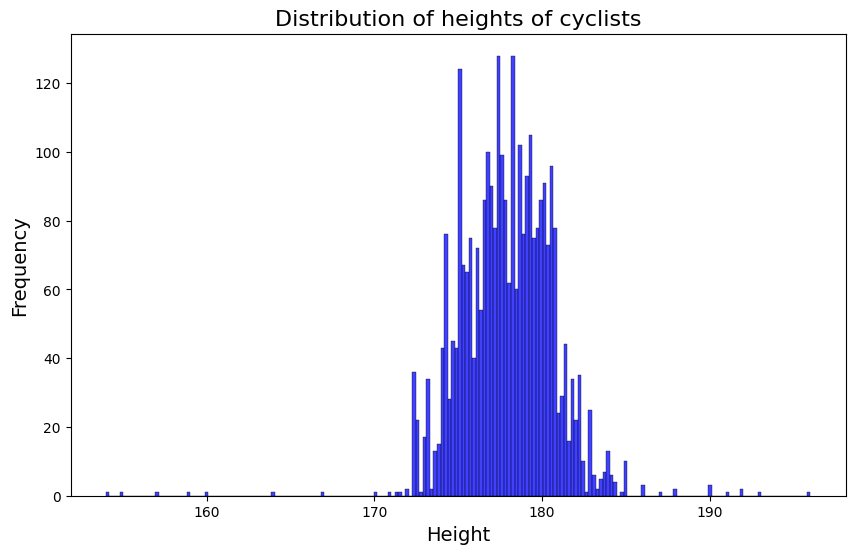

In [45]:
# Cyclist heights

plt.figure(figsize=(10, 6))

sns.histplot(imputed_rows['height'].dropna(), kde=False, bins=200, color='blue')

plt.title('Distribution of heights of cyclists', fontsize=16)
plt.xlabel('Height', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

In [46]:


df_imputed = df_cyclists.copy()

columns_to_impute = ['birth_year']

imputer = KNNImputer(n_neighbors=3)

df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

# Identify rows with missing values
missing_before = df_cyclists[df_cyclists[columns_to_impute].isnull().any(axis=1)]
imputed_rows = df_imputed.loc[missing_before.index]

# Display the imputed rows from the new dataframe
print("Imputed Rows:\n", imputed_rows)

Imputed Rows:
                     _url                 name   birth_year  weight  height nationality
9           scott-davies        Scott  Davies  1974.071884     NaN     NaN         NaN
601     vladimir-malakov    Vladimir  Malakov  1974.071884     NaN     NaN      Russia
894       antonio-zanini      Antonio  Zanini  1974.071884     NaN     NaN       Italy
2408   filippo-simonetti   Filippo  Simonetti  1974.071884     NaN     NaN       Italy
2515       carlos-garcia       Carlos  García  1974.071884     NaN     NaN       Spain
2536     alexandr-osipov     Alexandr  Osipov  1974.071884     NaN     NaN      Russia
3046    nicolai-kosyakov    Nicolai  Kosyakov  1974.071884     NaN     NaN      Russia
3551          nevens-guy          Guy  Nevens  1974.071884     NaN     NaN     Belgium
4142         oscar-pumar         Oscar  Pumar  1974.071884     NaN     NaN   Venezuela
4384       javier-luquin       Javier  Luquin  1974.071884     NaN     NaN       Spain
4756      thierry-lauder    

## <a id='toc2_2_'></a>[Outlier detection](#toc0_)

In [58]:
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)

Number of outliers in uci_points: 12022
Number of outliers in points: 45752
Number of outliers in length: 81960
Number of outliers in climb_total: 747
Number of outliers in average_temperature: 0
Number of outliers in position: 0
Number of outliers in cyclist_age: 4247
Number of outliers in delta: 33234


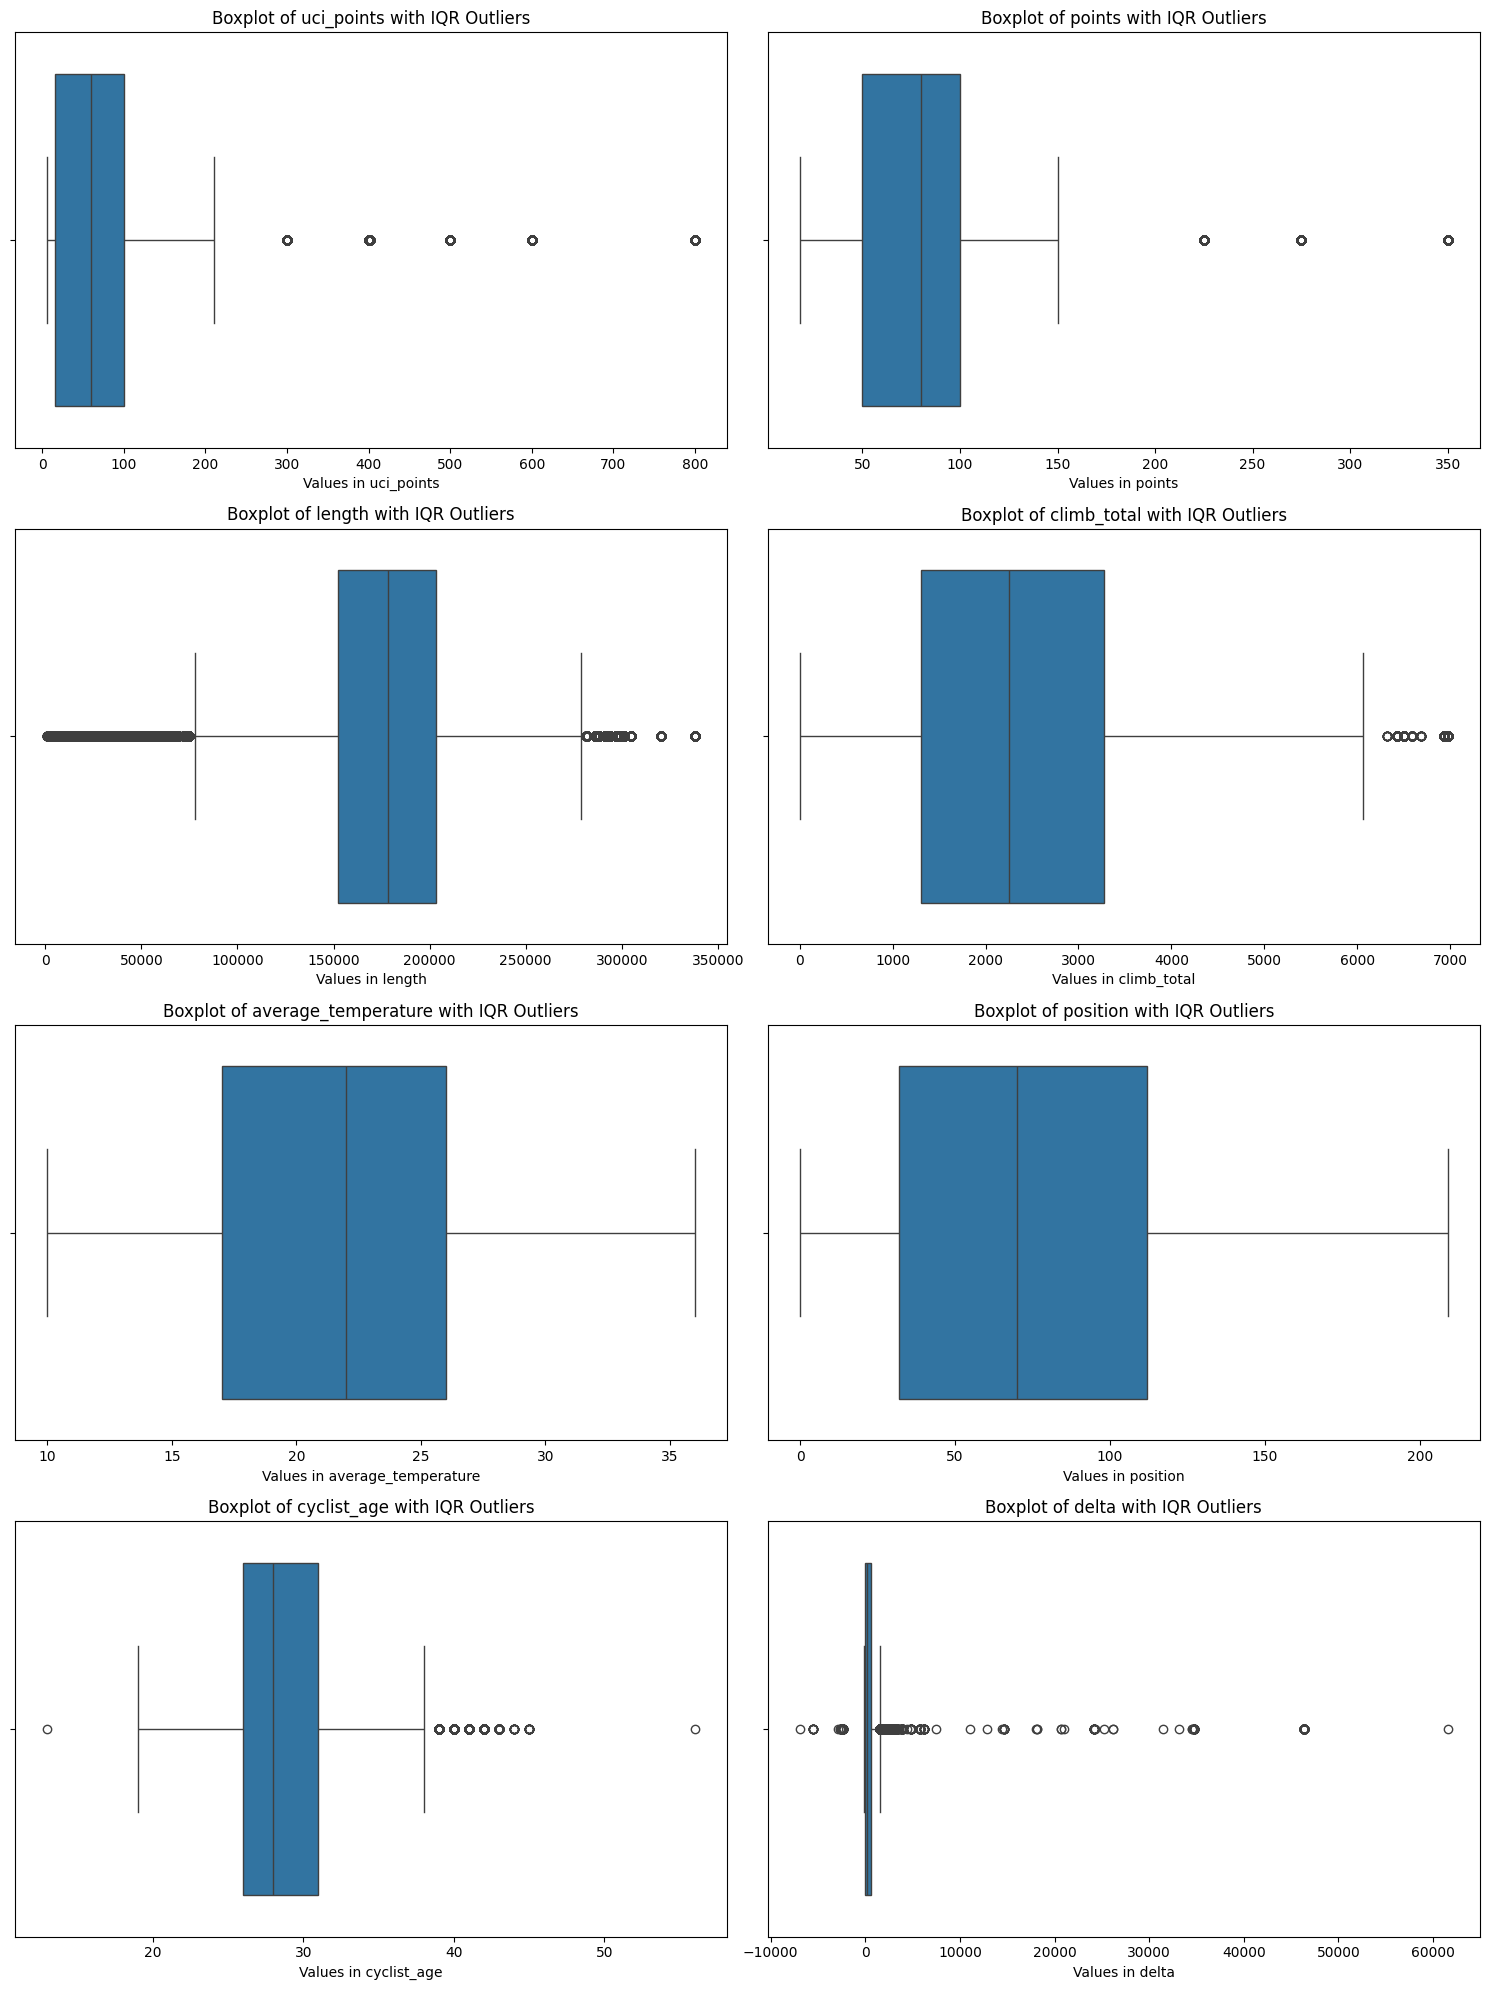

{'uci_points':                              _url                            name  points  uci_points    length  climb_total  profile  startlist_quality  average_temperature                 date  position               cyclist  cyclist_age  is_tarmac  is_cobbled  is_gravel                     cyclist_team  delta
8318    paris-roubaix/2021/result                   Paris-Roubaix   275.0       500.0  257700.0       1360.0      1.0                982                 13.0  2021-10-03 06:01:57         0       sonny-colbrelli         31.0      False       False      False                     hungary-2002    0.0
8319    paris-roubaix/2021/result                   Paris-Roubaix   275.0       500.0  257700.0       1360.0      1.0                982                 13.0  2021-10-03 06:01:57         1    florian-vermeersch         22.0      False       False      False      o.n.c.e.-deutsche-bank-2000    0.0
8320    paris-roubaix/2021/result                   Paris-Roubaix   275.0       500.0  2577

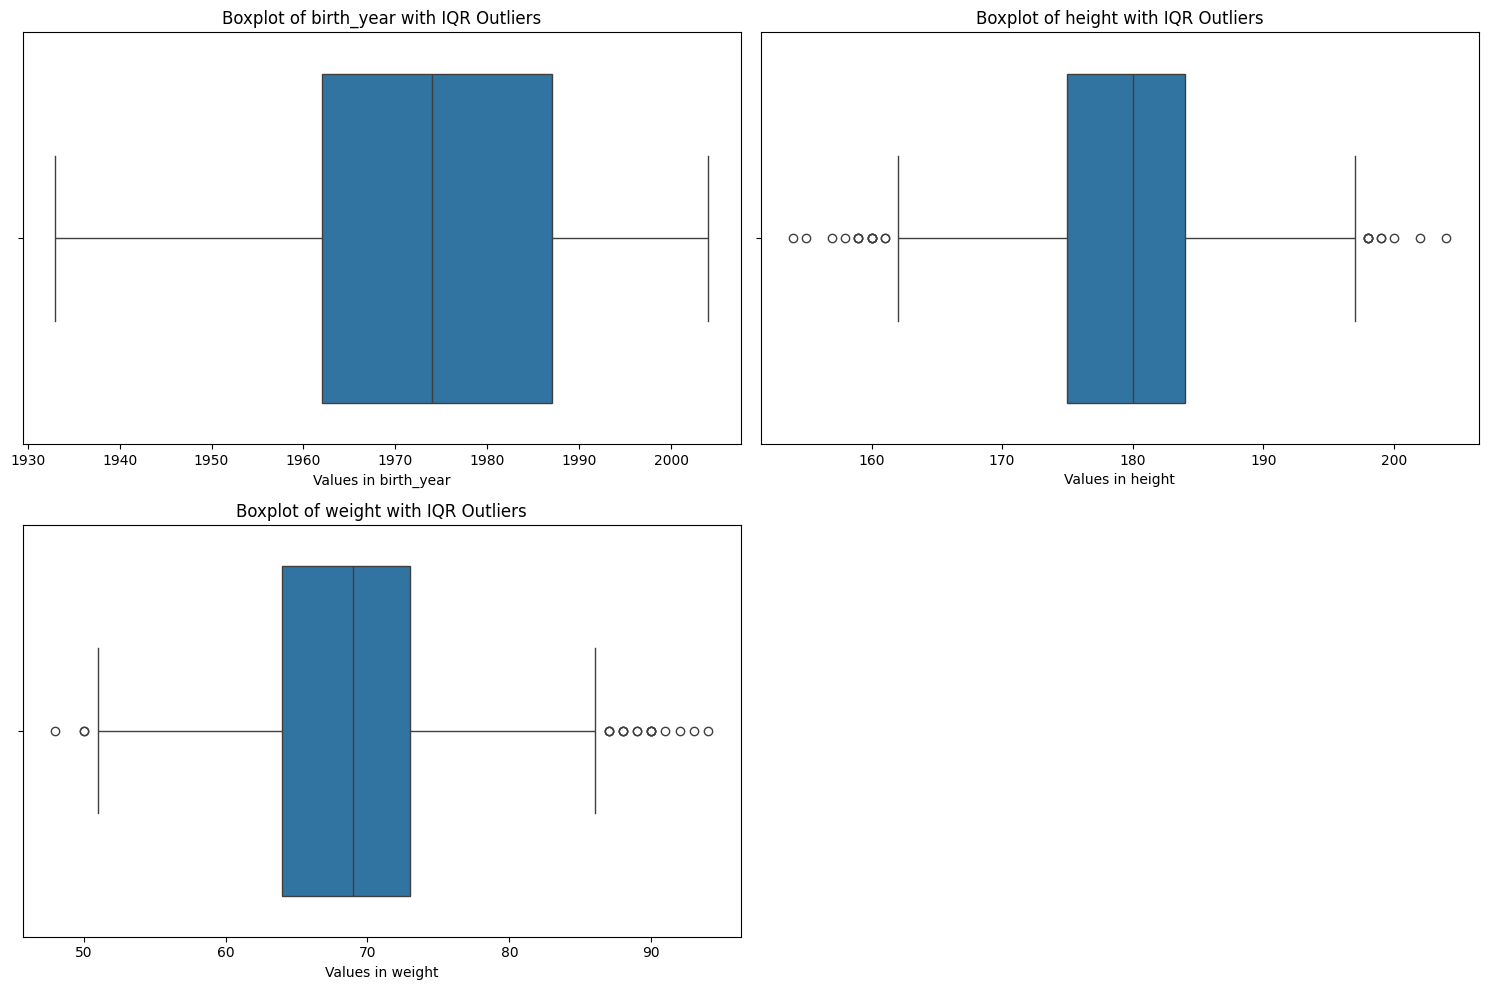

In [65]:
def plot_iqr_outliers(df: pd.DataFrame, columns: list, columns_per_row=2):
    """
    Detect outliers using IQR method and plot boxplots for multiple columns.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        columns (list): A list of column names to check for outliers and plot boxplots.
        columns_per_row (int): Number of columns per row for the grid layout (default: 2).
    
    Returns:
        dict: A dictionary with the outliers for each column.
    """
    outliers = {}
    
    num_cols = len(columns)
    num_rows = (num_cols + columns_per_row - 1) // columns_per_row
    
    # Create the grid of subplots
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))
    
    # Flatten the axes array for easier iteration
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        if col not in df.columns:
            print(f"Column {col} does not exist in the DataFrame.")
            continue

        # Filter out NaN values for calculations
        col_data = df[col].dropna()
        
        # Calculate Q1, Q3, and IQR
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers[col] = outliers_in_col
        
        # Plot the data using a boxplot
        sns.boxplot(x=col_data, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col} with IQR Outliers')
        axes[i].set_xlabel(f'Values in {col}')
        
        print(f"Number of outliers in {col}: {len(outliers_in_col)}")
    
    # Remove unused subplots if the number of columns is not a perfect multiple of columns_per_row
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
    
    return outliers

# Specify the columns to check
columns_to_check = ['uci_points', 'points', 'length', 'climb_total', 'average_temperature', 'position', 'cyclist_age', 'delta']

# Detect outliers using the IQR method and plot boxplots
outliers = plot_iqr_outliers(df_races, columns_to_check, columns_per_row=2)

print(outliers)

# Specify the columns to check
columns_to_check = ['birth_year', 'height', 'weight']

# Detect outliers using the IQR method and plot boxplots
outliers = plot_iqr_outliers(df_cyclists, columns_to_check, columns_per_row=2)


Let's generate histograms to do a quick check for which columns might be normally distributed

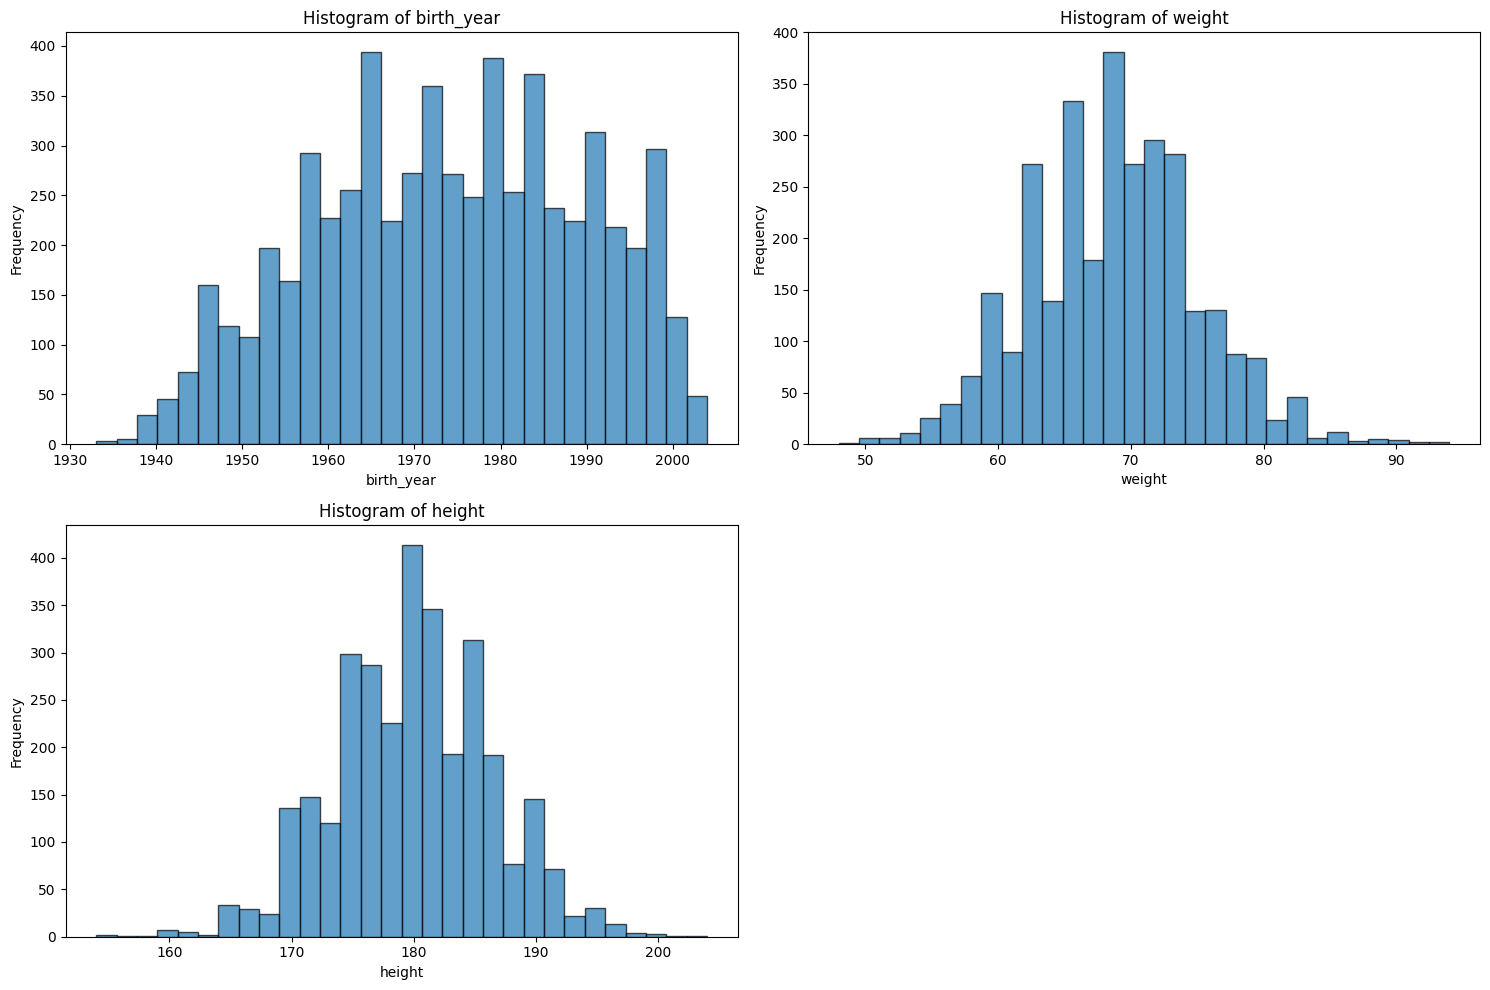

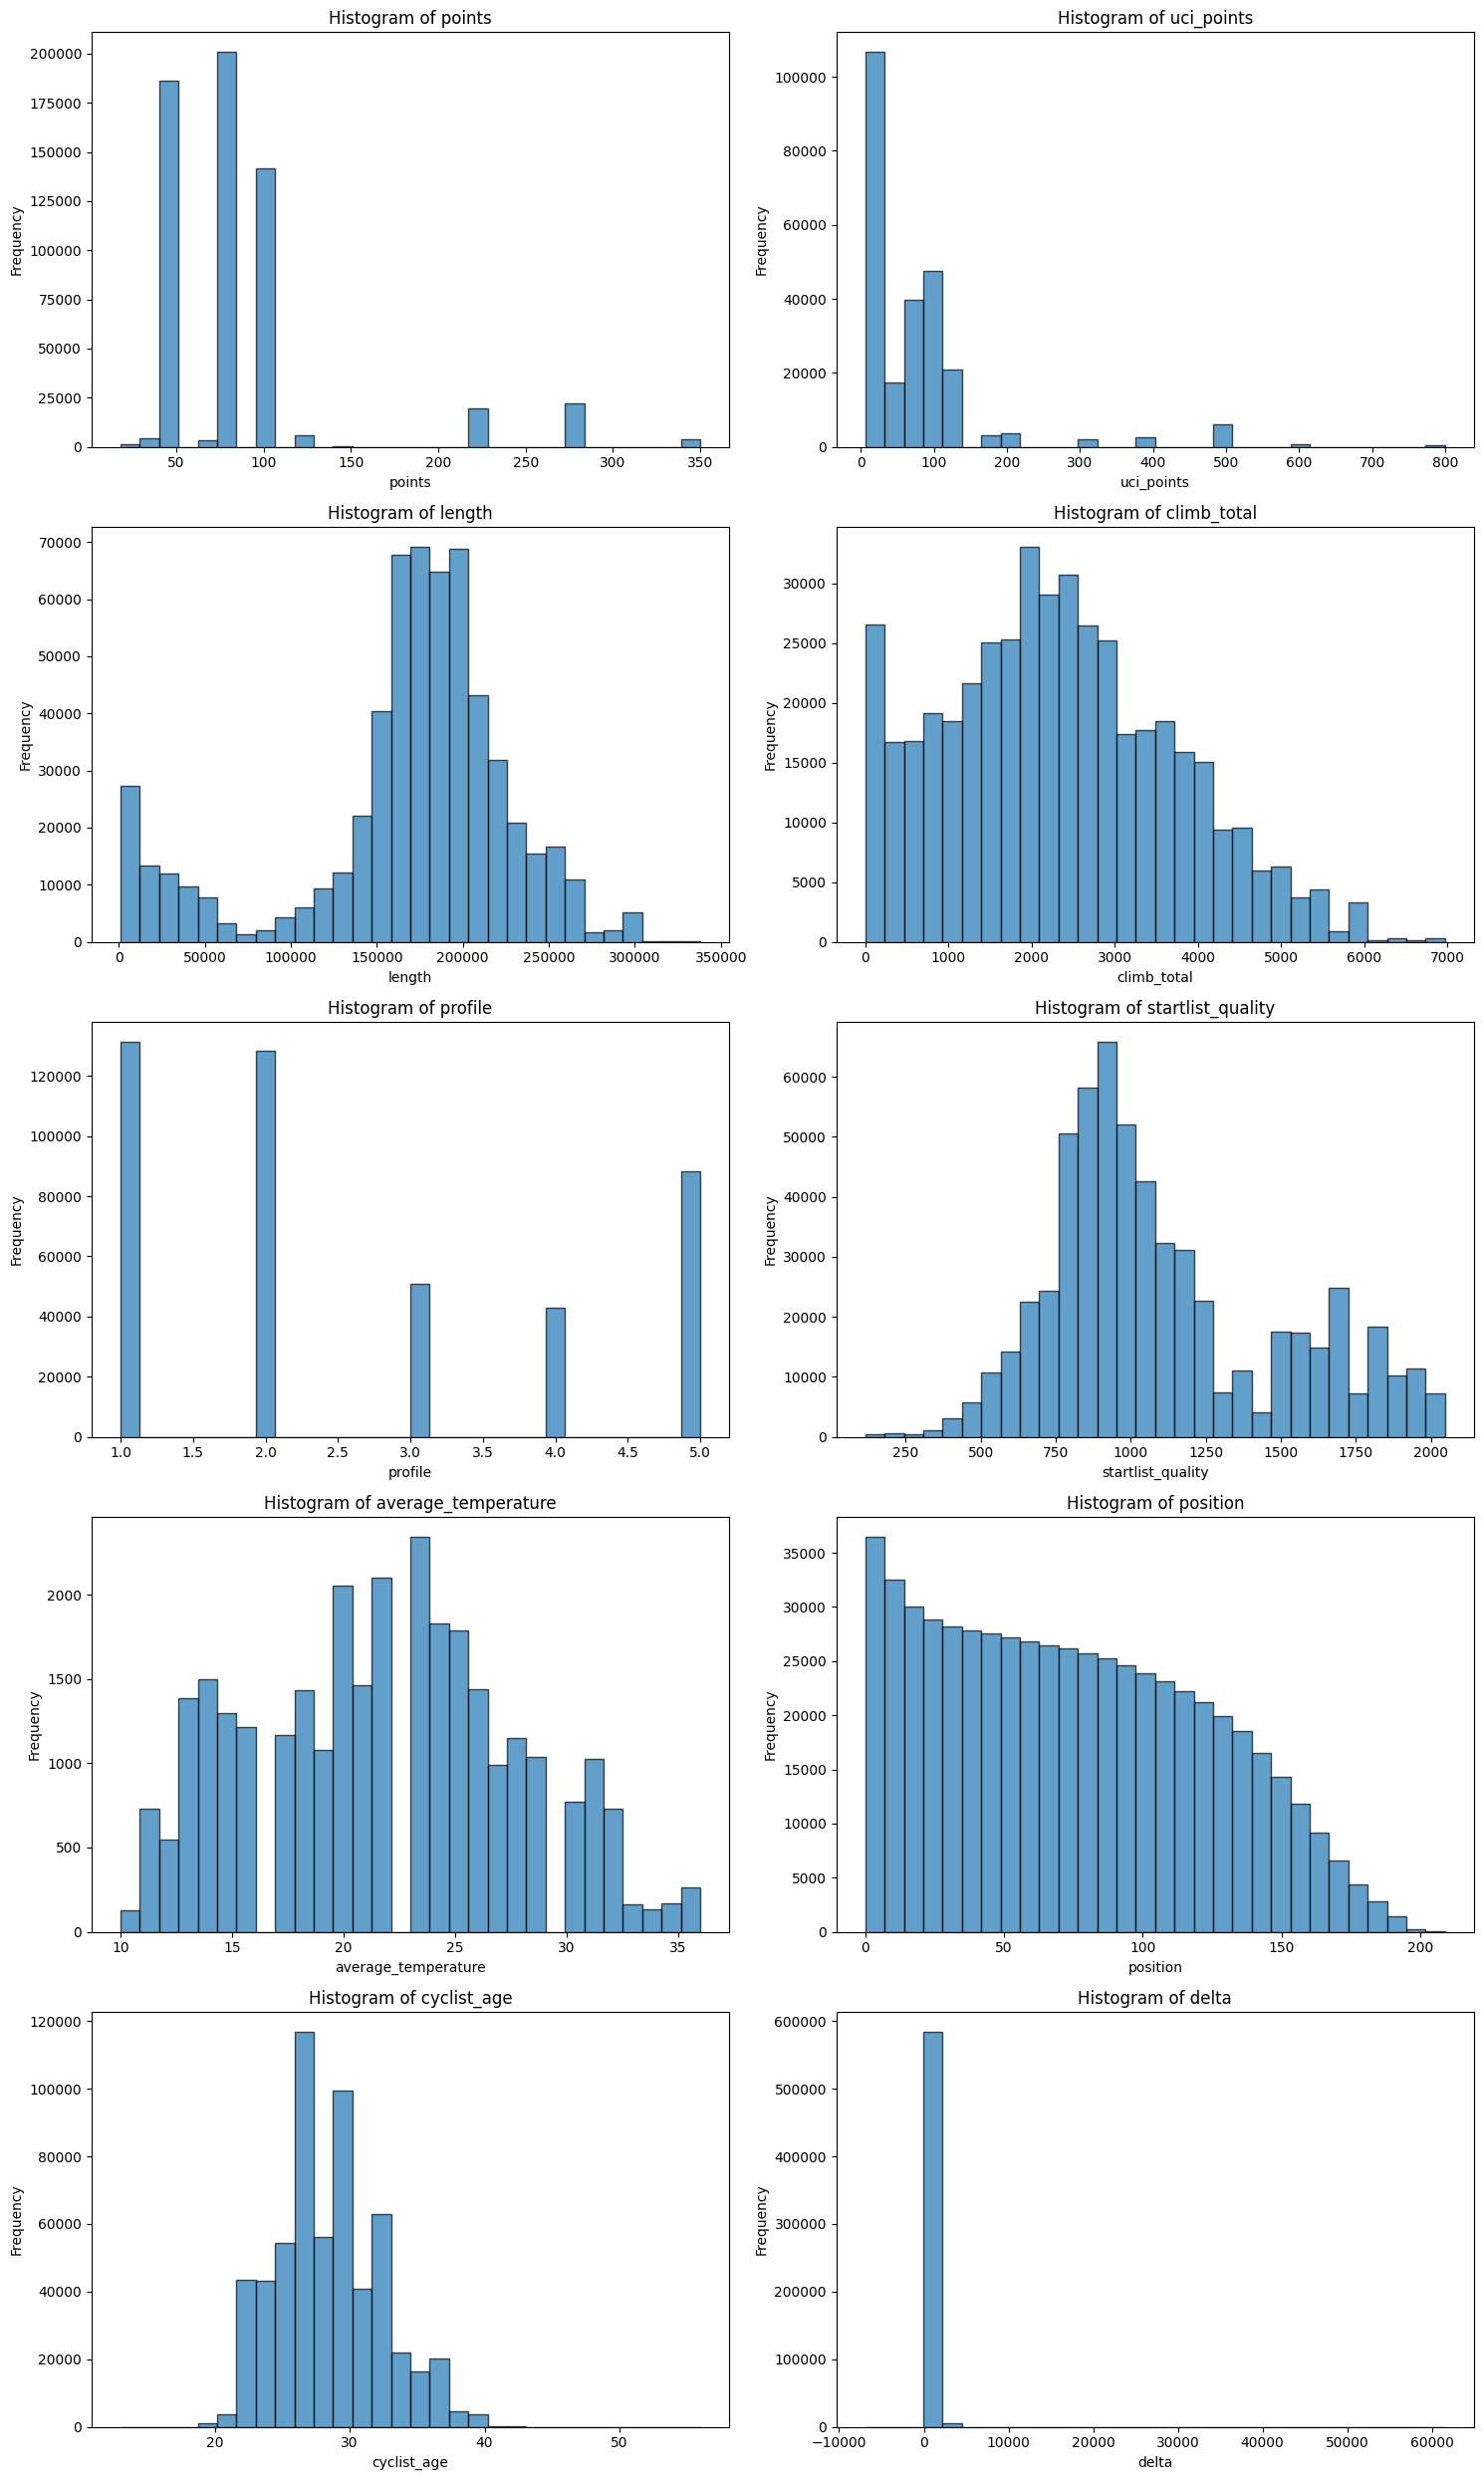

In [48]:
def plot_histograms(df, columns_per_row=2):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numerical_cols)
    
    # Calculate the number of rows required based on the number of columns per row
    num_rows = (num_cols + columns_per_row - 1) // columns_per_row
    
    # Set up the figure with a grid of subplots
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))
    
    # Flatten the axes array in case of multiple rows
    axes = axes.flatten()
    
    # Plot each column
    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(f"Histogram of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    # Remove any unused subplots if the number of columns is not a perfect multiple of columns_per_row
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

plot_histograms(df_cyclists)
plot_histograms(df_races)


Let's generate some Q-Q plots to determine which columns are likely normally distributed

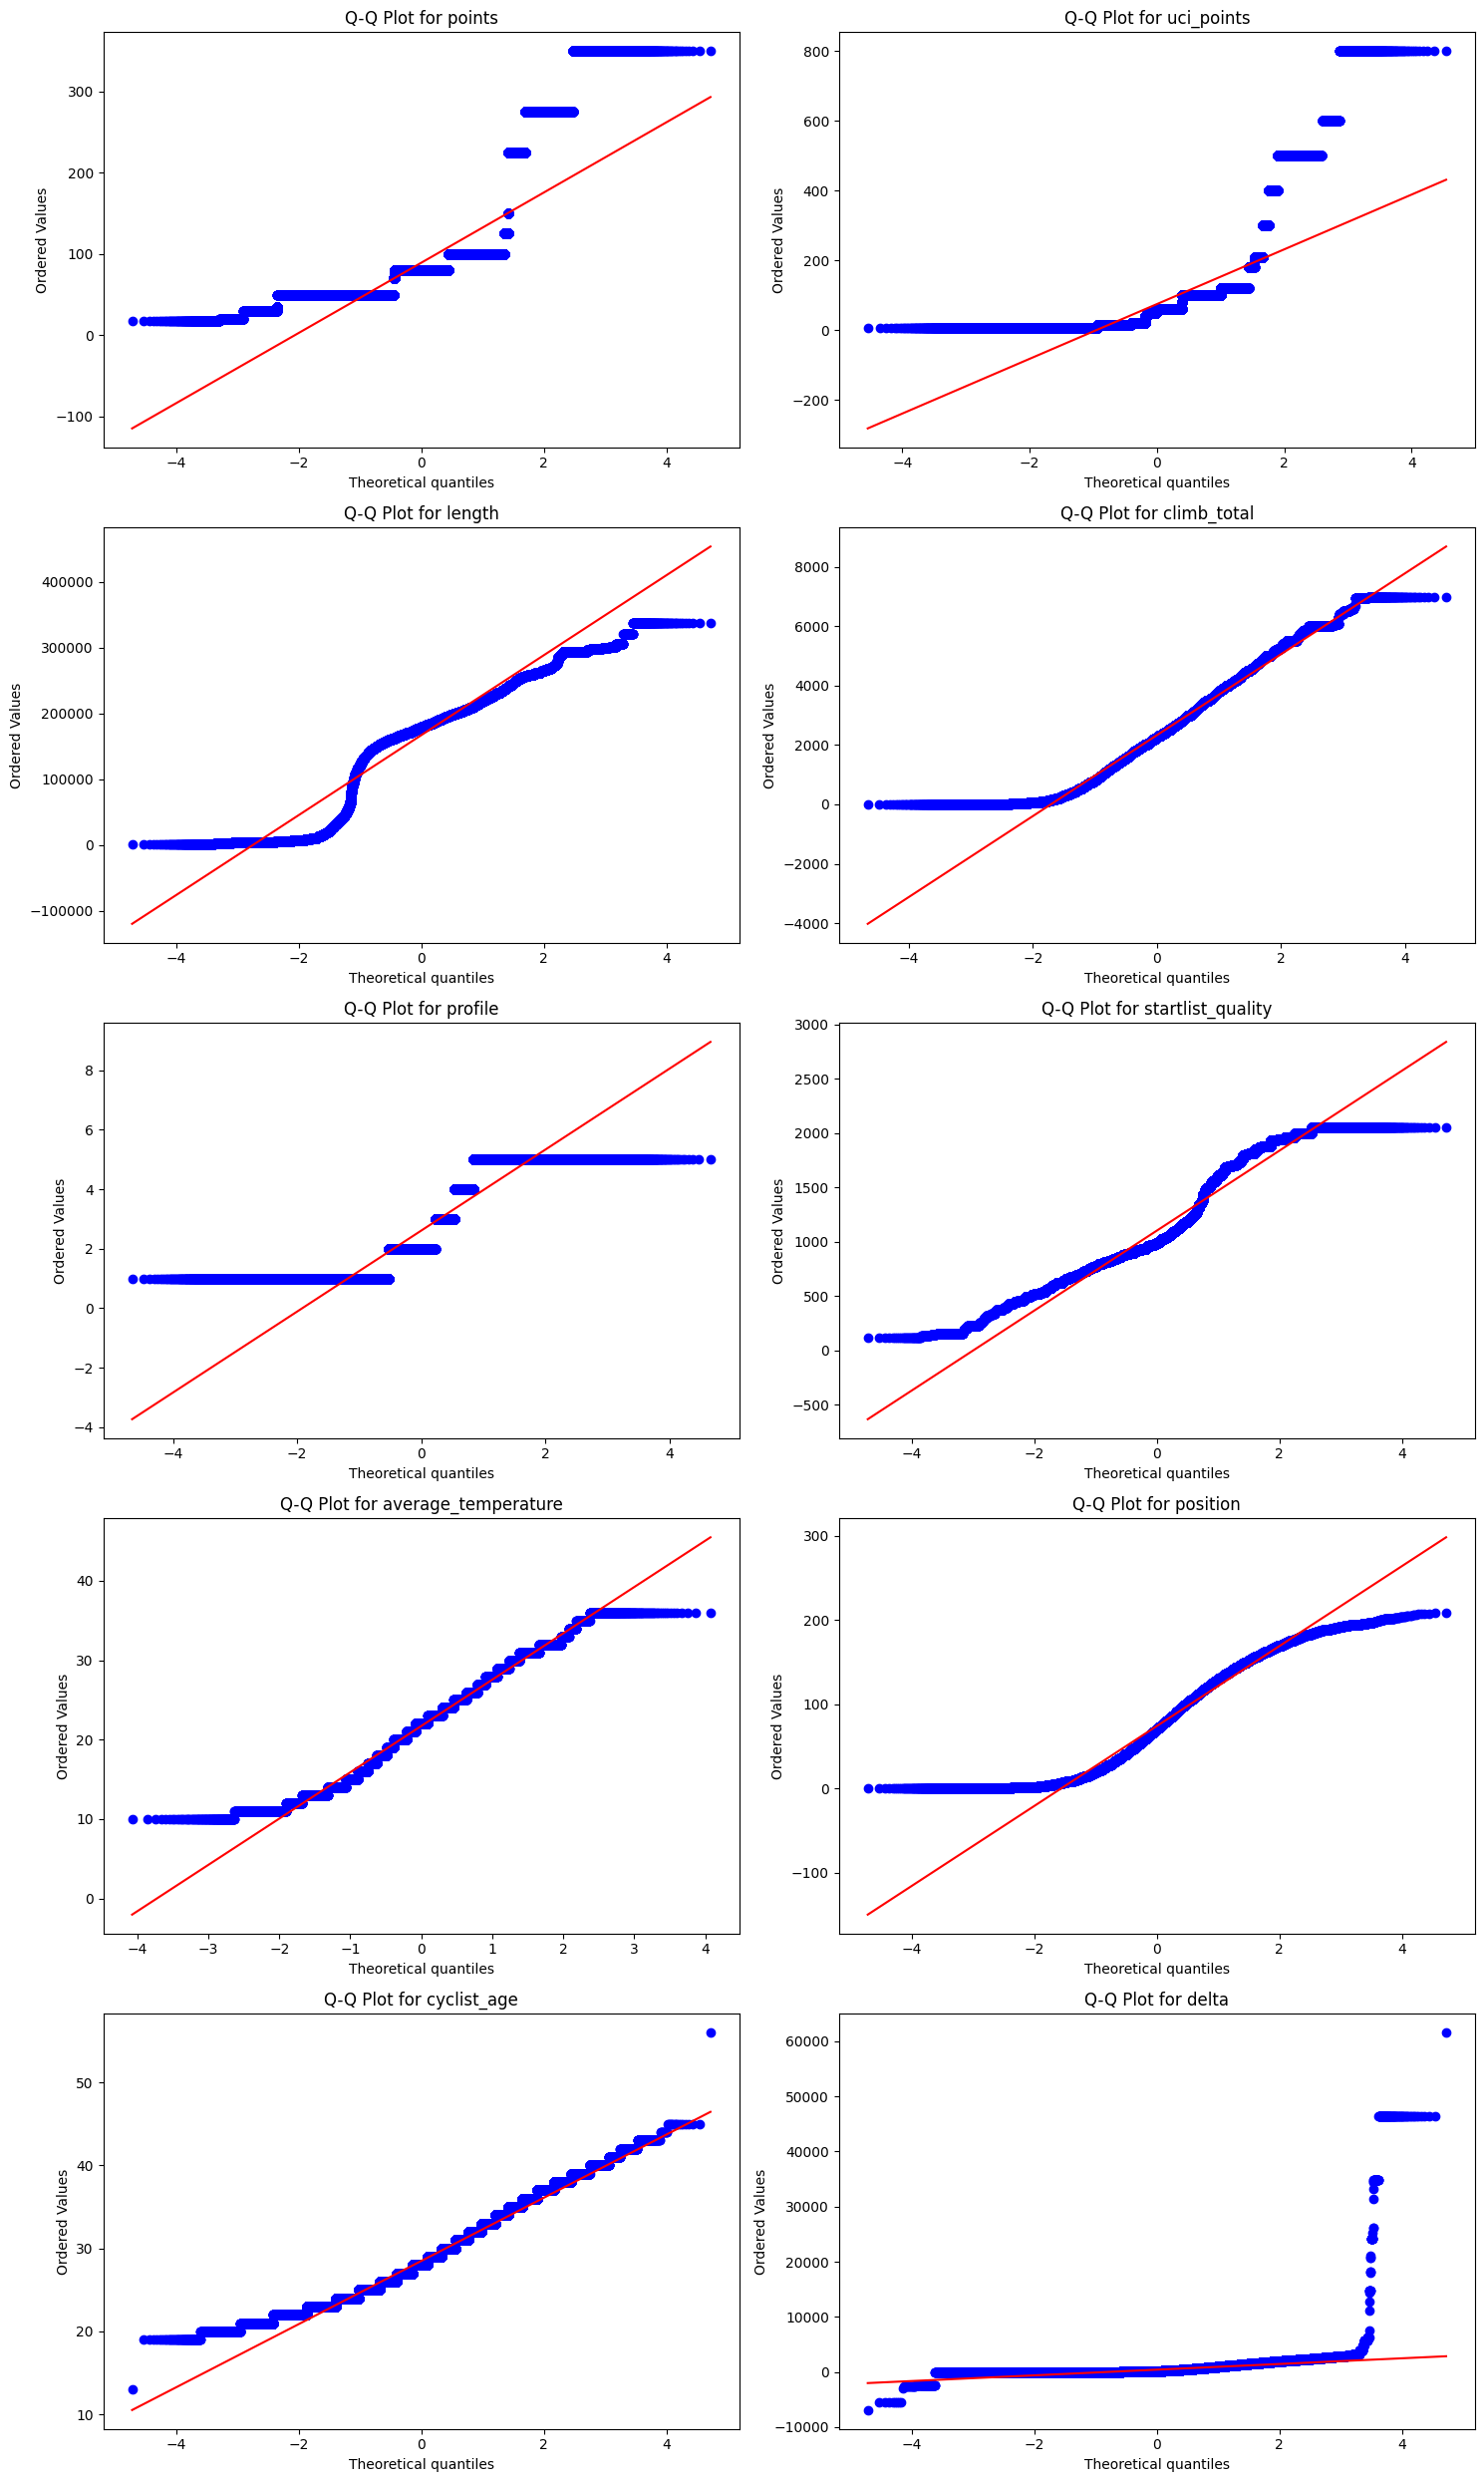

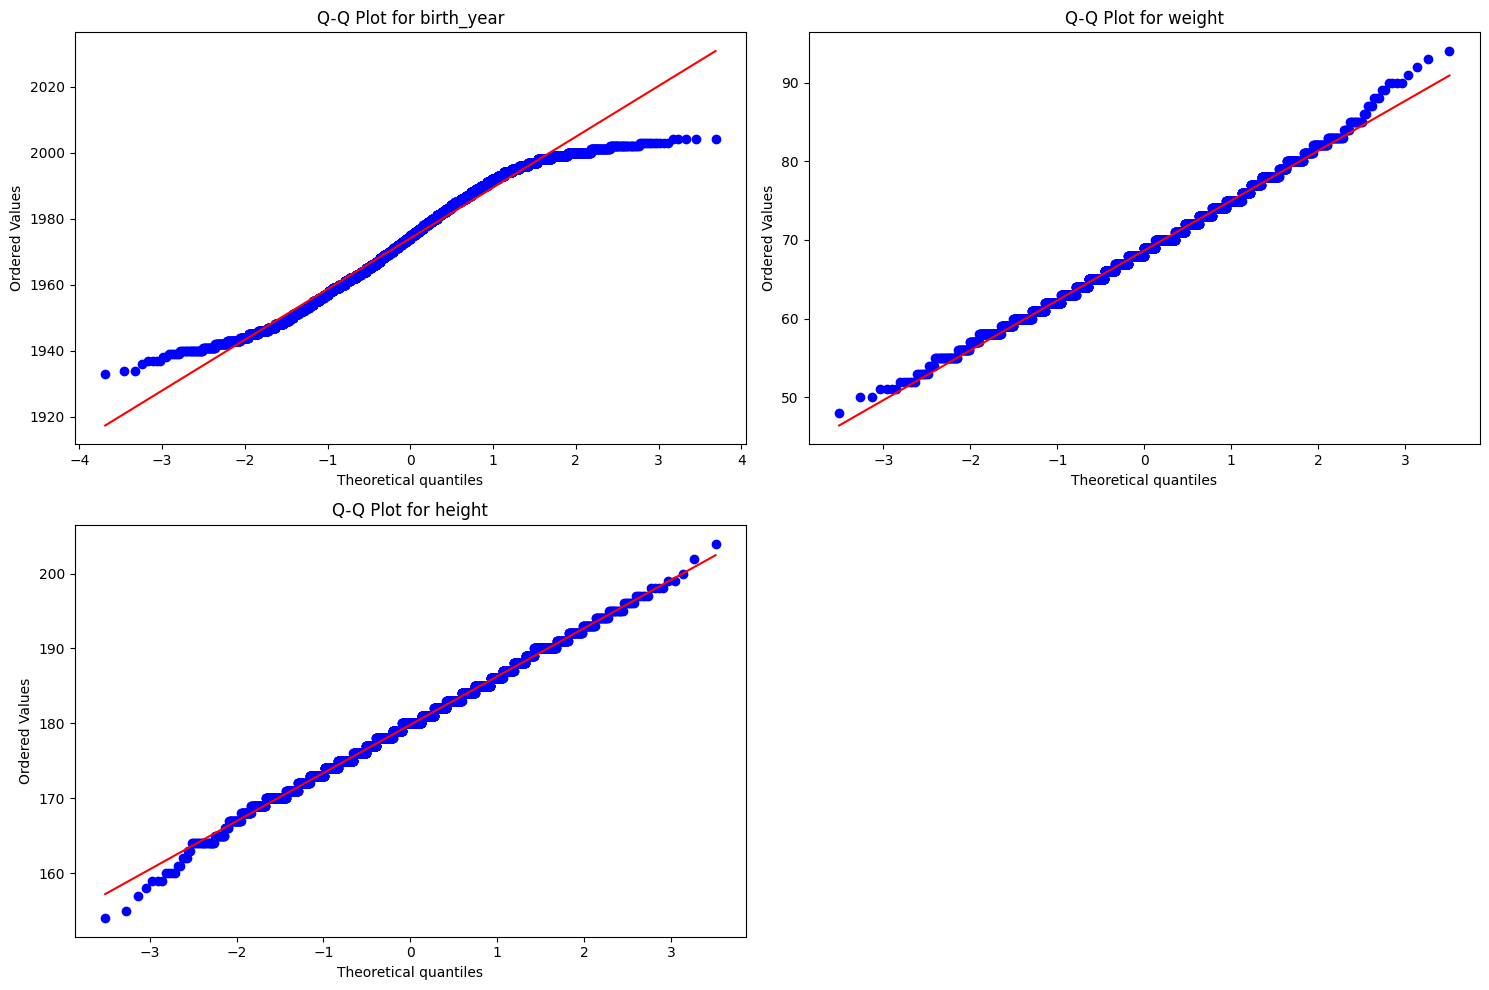

In [49]:
def generate_qq_plots(df, columns_per_row=2):
    # Select numerical columns in the dataframe
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numerical_cols)
    
    # Calculate the number of rows needed based on the number of columns per row
    num_rows = (num_cols + columns_per_row - 1) // columns_per_row
    
    # Set up the figure with a grid of subplots
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Plot Q-Q plots for each numerical column
    for i, col in enumerate(numerical_cols):
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[i])
        axes[i].set_title(f"Q-Q Plot for {col}")
    
    # Remove any unused subplots if the number of columns is not a perfect multiple of columns_per_row
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Generate Q-Q plots for each df
generate_qq_plots(df_races)
generate_qq_plots(df_cyclists)


In [50]:
from scipy.stats import normaltest

# Apply the D'Agostino-Pearson test
stat, p_value = normaltest(df_cyclists['weight'].dropna())

if p_value > 0.05:
    print(f"Height: Normally distributed (p-value = {p_value:.4f})")
else:
    print(f"Height: Not normally distributed (p-value = {p_value:.4f})")

Height: Not normally distributed (p-value = 0.0000)


For normally distributed variables, we can use Grubb's test

In [62]:
import pandas as pd
import numpy as np
from scipy.stats import t

# Logic for test taken from Method 3 here: https://blog.finxter.com/5-best-ways-to-perform-grubbs-test-in-python/
# This also helps to understand: https://github.com/bhattbhavesh91/outlier-detection-grubbs-test-and-generalized-esd-test-python/blob/master/grubbs-test-for-outliers.ipynb

def grubbs_test(df, columns, alpha=0.05):
    """
    Perform Grubbs' test on the specified columns of a DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        columns (list): A list of column names to apply Grubbs' test.
        alpha (float): The significance level (default: 0.05).
    
    Returns:
        dict: A dictionary with the results of Grubbs' test for each column.
    """
    results = {}
    
    for col in columns:
        if col not in df.columns:
            print(f"Column {col} does not exist in the DataFrame.")
            continue
        
        data = df[col].dropna().values  # Drop any missing values
        N = len(data)
        
        if N < 3:  # Ensure there's enough data to run the test
            print(f"Not enough data points in {col} to run Grubbs' test.")
            continue
        
        mean = np.mean(data)
        std_dev = np.std(data, ddof=1)
        
        # Grubbs' test statistic
        G_calculated = max(abs(data - mean)) / std_dev
        
        # Critical value for Grubbs' test
        t_critical = t.isf(alpha / (2 * N), N - 2)
        G_critical = ((N - 1) / np.sqrt(N)) * np.sqrt(t_critical**2 / (N - 2 + t_critical**2))
        
        # Check if outlier exists
        outlier_detected = G_calculated > G_critical
        
        # Store results
        results[col] = {
            'G_calculated': G_calculated,
            'G_critical': G_critical,
            'outlier_detected': outlier_detected
        }
    
    return results

columns_to_check = ['height', 'weight']
grubbs_results = grubbs_test(df_cyclists, columns_to_check, alpha=0.05)

for col, res in grubbs_results.items():
    print(f"Column: {col}")
    print(f"  G_calculated: {res['G_calculated']:.4f}")
    print(f"  G_critical: {res['G_critical']:.4f}")
    print(f"  Outlier detected: {res['outlier_detected']}\n")


Column: height
  G_calculated: 4.0064
  G_critical: 4.3097
  Outlier detected: False

Column: weight
  G_calculated: 3.9919
  G_critical: 4.3049
  Outlier detected: False



For non-normal columns, we can use Chebyshev's Inequality (better than Markov's inequality because we know the variance)

In [66]:
def chebyshev_outliers(df, columns, k=3):
    """
    Detect outliers using Chebyshev's inequality on the specified columns of a DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        columns (list): A list of column names to apply Chebyshev's inequality.
        k (float): The number of standard deviations to check for outliers (default: 3).
    
    Returns:
        dict: A dictionary with the outliers for each column.
    """
    outliers = {}
    
    for col in columns:
        if col not in df.columns:
            print(f"Column {col} does not exist in the DataFrame.")
            continue
        
        data = df[col].dropna().values  # Drop any missing values
        mean = np.mean(data)
        std_dev = np.std(data, ddof=1)
        
        # Chebyshev's inequality: values greater than k standard deviations from the mean
        lower_bound = mean - k * std_dev
        upper_bound = mean + k * std_dev
        outliers_in_col = data[(data < lower_bound) | (data > upper_bound)]
        
        outliers[col] = {
            'mean': mean,
            'std_dev': std_dev,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outliers': outliers_in_col.tolist()
        }
    
    return outliers

columns_to_check = ['birth_year']
chebyshev_results = chebyshev_outliers(df_cyclists, columns_to_check, k=3)

for col, res in chebyshev_results.items():
    print(f"Column: {col}")
    print(f"  Mean: {res['mean']:.4f}")
    print(f"  Std Dev: {res['std_dev']:.4f}")
    print(f"  Lower Bound: {res['lower_bound']:.4f}")
    print(f"  Upper Bound: {res['upper_bound']:.4f}")
    print(f"  Outliers: {res['outliers']}\n")

columns_to_check = ['uci_points', 'points', 'length', 'climb_total', 'average_temperature', 'position', 'cyclist_age', 'delta']
chebyshev_results = chebyshev_outliers(df_races, columns_to_check, k=3)

for col, res in chebyshev_results.items():
    print(f"Column: {col}")
    print(f"  Mean: {res['mean']:.4f}")
    print(f"  Std Dev: {res['std_dev']:.4f}")
    print(f"  Lower Bound: {res['lower_bound']:.4f}")
    print(f"  Upper Bound: {res['upper_bound']:.4f}")
    print(f"  Outliers: {res['outliers']}\n")


Column: birth_year
  Mean: 1974.0719
  Std Dev: 15.5358
  Lower Bound: 1927.4644
  Upper Bound: 2020.6794
  Outliers: []

Column: uci_points
  Mean: 74.6015
  Std Dev: 100.9480
  Lower Bound: -228.2423
  Upper Bound: 377.4454
  Outliers: [500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0

In [67]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to multiple lines

def pca_outlier_contribution_and_plot_3d(df, columns, n_components=3, threshold=2.5):
    # Ensure only the specified columns are selected
    df_numerical = df[columns]
    
    # Drop rows with missing values (NaN) in the selected columns
    df_numerical_cleaned = df_numerical.dropna()
    
    # Standardize the numerical data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_numerical_cleaned)
    
    # Apply PCA to reduce the dimensionality of the numerical data
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Reconstruct the data from the principal components
    X_reconstructed = pca.inverse_transform(X_pca)
    
    # Compute the reconstruction error for each feature (column-wise error)
    column_wise_error = (X_scaled - X_reconstructed) ** 2  # Error for each column
    
    # Compute the overall reconstruction error (sum across columns)
    reconstruction_error = np.sum(column_wise_error, axis=1)
    
    # Flag points with high overall reconstruction error as outliers
    outliers = reconstruction_error > threshold
    
    # Create a copy of the original DataFrame
    df_copy = df.loc[df_numerical_cleaned.index].copy()  # Only keep rows without missing values
    
    # Add the reconstruction error and outlier flag to the copy of the DataFrame
    df_copy['reconstruction_error'] = reconstruction_error
    df_copy['is_outlier'] = outliers
    
    # Compute and display PCA loadings (weights of each feature on each principal component)
    loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=columns)
    
    # Show the loadings
    print("PCA Loadings (weights of each feature on the principal components):")
    print(loadings)
    
    # Create a 3D interactive plot using Plotly
    fig = px.scatter_3d(
        x=X_pca[:, 0],  # Principal Component 1
        y=X_pca[:, 1],  # Principal Component 2
        z=X_pca[:, 2],  # Principal Component 3
        title='3D PCA Manifold with Outliers',
        labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
        opacity=0.7,
    )
    
    fig.update_traces(marker=dict(size=5))
    fig.show()
    
    # If a row is an outlier, find which columns contributed most to the error
    contribution = pd.DataFrame(column_wise_error, columns=df_numerical_cleaned.columns, index=df_numerical_cleaned.index)
    
    # Return DataFrame with outlier information and column-wise contributions
    return df_copy, contribution, loadings

selected_columns = ['points', 'uci_points', 'length', 'climb_total', 'profile', 'startlist_quality', 'average_temperature', 'cyclist_age']  # Exclude 'position' and any irrelevant columns
outliers_df, contribution_df, loadings_df = pca_outlier_contribution_and_plot_3d(df_races, selected_columns, n_components=3, threshold=15)

# Display outliers with their overall reconstruction error
print(outliers_df[outliers_df['is_outlier']])

# Display contribution of each column for the outlier rows
outliers_contributions = contribution_df.loc[outliers_df[outliers_df['is_outlier']].index]
print(outliers_contributions)

# Show the loadings (weights of each feature on each principal component)
print(loadings_df)


PCA Loadings (weights of each feature on the principal components):
                          PC1       PC2       PC3
points               0.604008 -0.154843  0.001388
uci_points           0.599581 -0.159351 -0.041082
length               0.424460  0.142464 -0.072864
climb_total          0.198540  0.680754 -0.013191
profile             -0.020687  0.679473  0.094213
startlist_quality    0.199456 -0.007562  0.674588
average_temperature -0.122046 -0.071144  0.681792
cyclist_age          0.031408  0.010352  0.253067


                                  _url               name  points  uci_points   length  climb_total  profile  startlist_quality  average_temperature                 date  position                   cyclist  cyclist_age  is_tarmac  is_cobbled  is_gravel                          cyclist_team  delta  reconstruction_error  is_outlier
41561         gran-camino/2023/stage-4      O Gran Camiño    20.0        14.0  18100.0        308.0      2.0                156                 11.0  2023-02-26 00:28:54       111          david-livramento         40.0       True       False      False       liberty-seguros-wurth-team-2005  307.0             15.613165        True
139959  tirreno-adriatico/2023/stage-1  Tirreno-Adriatico    50.0        60.0  11500.0          3.0      1.0               1044                 13.0  2023-03-06 00:13:42        45            dries-devenyns         40.0       True       False      False               csf-group-navigare-2008   74.0             16.019187        True
2462